In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

import os
import env

In [4]:
import acquire
import wrangle

wrangle.py functions loaded successfully.


In [14]:
df = wrangle.get_telco_data_two_year()
df

,customer_id,monthly_charges,tenure,total_charges,contract_type_id,contract_type
0,0016-QLJIS,90.45,65,5957.9,3,Two year
1,0017-DINOC,45.20,54,2460.55,3,Two year
2,0019-GFNTW,45.05,56,2560.1,3,Two year
3,0056-EPFBG,39.40,20,825.4,3,Two year
4,0078-XZMHT,85.15,72,6316.2,3,Two year
...,...,...,...,...,...,...
1690,9950-MTGYX,20.30,28,487.95,3,Two year
1691,9953-ZMKSM,25.25,63,1559.3,3,Two year
1692,9964-WBQDJ,24.40,71,1725.4,3,Two year
1693,9972-EWRJS,19.25,67,1372.9,3,Two year


In [15]:
train, validate, test = wrangle.prep_acquired_telco()

Shape of train df: (1217, 6)
Shape of validate df: (215, 6)
Shape of test df: (253, 6)


In [16]:
train

,customer_id,monthly_charges,tenure,total_charges,contract_type_id,contract_type
1050,9861-PDSZP,108.05,72,7806.60,3,Two year
971,8041-TMEID,108.50,63,6991.90,3,Two year
590,9443-JUBUO,65.25,72,4478.85,3,Two year
588,9415-ZNBSX,89.00,70,6293.20,3,Two year
1322,3976-HXHCE,19.30,72,1414.80,3,Two year
...,...,...,...,...,...,...
1218,2481-SBOYW,25.00,61,1498.35,3,Two year
355,5915-ANOEI,79.15,70,5536.50,3,Two year
1085,0505-SPOOW,19.80,70,1397.65,3,Two year
613,9795-NREXC,85.00,64,5484.40,3,Two year


# Exercises

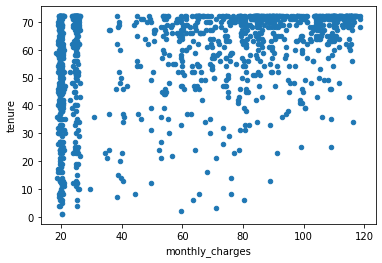

In [19]:
# Initial visualization of the data:

train.plot.scatter(y = 'tenure', x = 'monthly_charges')

In [20]:
train.describe()

,monthly_charges,tenure,total_charges,contract_type_id
count,1217.000000,1217.000000,1217.000000,1217.0
mean,60.459121,57.133114,3701.473870,3.0
std,34.586051,17.641590,2567.221506,0.0
min,18.400000,1.000000,20.350000,3.0
25%,23.950000,48.000000,1275.600000,3.0
50%,64.150000,64.000000,3533.600000,3.0
75%,89.950000,71.000000,5986.450000,3.0
max,118.750000,72.000000,8672.450000,3.0


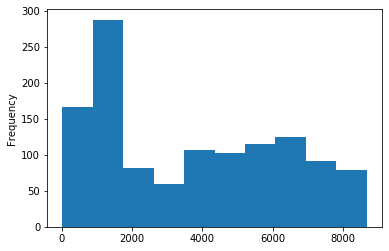

In [23]:
train.total_charges.plot.hist()
plt.show()

I've already split the datasets into train, validate and test, so 

#### 1. Apply the scalers we talked about in this lesson to your data and visualize the results in a way you find helpful.

Make visualizations that enhance my own understanding of the data. Can be the ones used in the lesson, or can be my own.

In [55]:
# 1. Creating the scaler object:

scaler_minmax = sklearn.preprocessing.MinMaxScaler()

# 2. Fitting ONLY do the train dataset. Remember, this is only useful on continuous variables, not categorical variables:
scaler_minmax.fit(train[['total_charges', 'monthly_charges', 'tenure']])

# 3. Now use the object on all three datasets. Remember, I'm using this object which was fitted to the train dataset:
train[['total_charges', 'monthly_charges', 'tenure']] = scaler_minmax.transform(train[['total_charges', 'monthly_charges', 'tenure']])
validate[['total_charges', 'monthly_charges', 'tenure']] = scaler_minmax.transform(validate[['total_charges', 'monthly_charges', 'tenure']])
test[['total_charges', 'monthly_charges', 'tenure']] = scaler_minmax.transform(test[['total_charges', 'monthly_charges', 'tenure']])

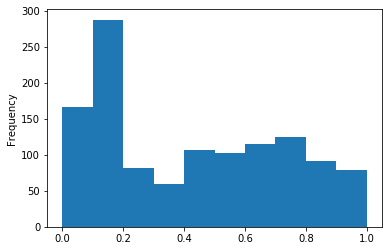

In [56]:
# Note how the x axis range is between 0 and 1.

train.total_charges.plot.hist()

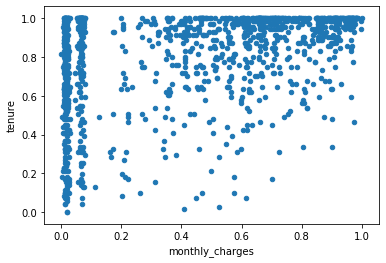

In [57]:
# Same thing, the x axis has changed, but the shape of the data remains the same.

train.plot.scatter(y = 'tenure', x = 'monthly_charges')

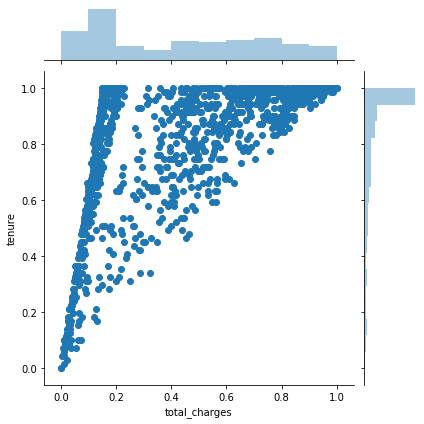

In [58]:
sns.jointplot(data = train, x = "total_charges", y = "tenure")

In [36]:
sklearn.inverse_transform?

Object `sklearn.inverse_transform` not found.


#### Applying the standard scaling process to the data:

In [59]:
# Reimporting data under another train/validate/test dataset:

train2, validate2, test2 = wrangle.prep_acquired_telco()
train2

Shape of train df: (1217, 6)
Shape of validate df: (215, 6)
Shape of test df: (253, 6)


,customer_id,monthly_charges,tenure,total_charges,contract_type_id,contract_type
1050,9861-PDSZP,108.05,72,7806.60,3,Two year
971,8041-TMEID,108.50,63,6991.90,3,Two year
590,9443-JUBUO,65.25,72,4478.85,3,Two year
588,9415-ZNBSX,89.00,70,6293.20,3,Two year
1322,3976-HXHCE,19.30,72,1414.80,3,Two year
...,...,...,...,...,...,...
1218,2481-SBOYW,25.00,61,1498.35,3,Two year
355,5915-ANOEI,79.15,70,5536.50,3,Two year
1085,0505-SPOOW,19.80,70,1397.65,3,Two year
613,9795-NREXC,85.00,64,5484.40,3,Two year


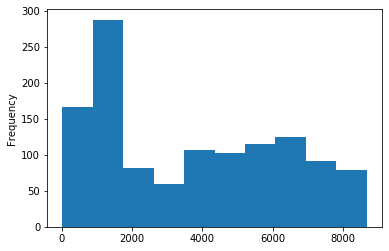

In [60]:
train2.total_charges.plot.hist()
plt.show()

In [61]:
# 1. Creating the scaler object:

scaler = sklearn.preprocessing.StandardScaler()

# 2. Fitting ONLY do the train dataset. Remember, this is only useful on continuous variables, not categorical variables:
scaler.fit(train2[['total_charges', 'monthly_charges', 'tenure']])

# 3. Now use the object on all three datasets. Remember, I'm using this object which was fitted to the train dataset:
train2[['total_charges', 'monthly_charges', 'tenure']] = scaler.transform(train2[['total_charges', 'monthly_charges', 'tenure']])
validate2[['total_charges', 'monthly_charges', 'tenure']] = scaler.transform(validate2[['total_charges', 'monthly_charges', 'tenure']])
test2[['total_charges', 'monthly_charges', 'tenure']] = scaler.transform(test2[['total_charges', 'monthly_charges', 'tenure']])

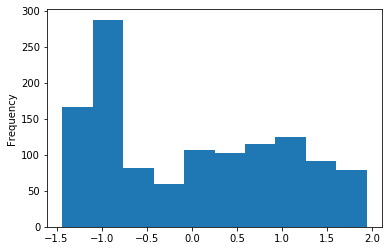

In [62]:
train2.total_charges.plot.hist()
plt.show()

In [42]:
# Using the RobustScaler:

# Reimporting data under another train/validate/test dataset:

train3, validate3, test3 = wrangle.prep_acquired_telco()
train3

Shape of train df: (1217, 6)
Shape of validate df: (215, 6)
Shape of test df: (253, 6)


,customer_id,monthly_charges,tenure,total_charges,contract_type_id,contract_type
1050,9861-PDSZP,108.05,72,7806.60,3,Two year
971,8041-TMEID,108.50,63,6991.90,3,Two year
590,9443-JUBUO,65.25,72,4478.85,3,Two year
588,9415-ZNBSX,89.00,70,6293.20,3,Two year
1322,3976-HXHCE,19.30,72,1414.80,3,Two year
...,...,...,...,...,...,...
1218,2481-SBOYW,25.00,61,1498.35,3,Two year
355,5915-ANOEI,79.15,70,5536.50,3,Two year
1085,0505-SPOOW,19.80,70,1397.65,3,Two year
613,9795-NREXC,85.00,64,5484.40,3,Two year


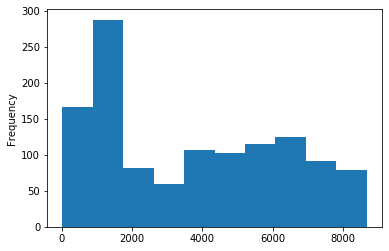

In [64]:
train3.total_charges.plot.hist()
plt.show()

In [66]:
# 1. Creating the scaler object:

scaler_robust = sklearn.preprocessing.RobustScaler()

# 2. Fitting ONLY do the train dataset. Remember, this is only useful on continuous variables, not categorical variables:
scaler_robust.fit(train2[['total_charges', 'monthly_charges', 'tenure']])

# 3. Now use the object on all three datasets. Remember, I'm using this object which was fitted to the train dataset:
train3[['total_charges', 'monthly_charges', 'tenure']] = scaler_robust.transform(train3[['total_charges', 'monthly_charges', 'tenure']])
validate3[['total_charges', 'monthly_charges', 'tenure']] = scaler_robust.transform(validate3[['total_charges', 'monthly_charges', 'tenure']])
test3[['total_charges', 'monthly_charges', 'tenure']] = scaler_robust.transform(test3[['total_charges', 'monthly_charges', 'tenure']])

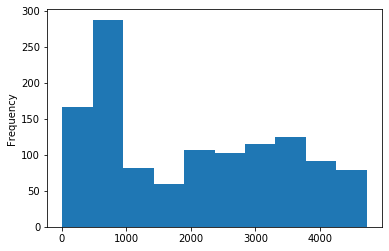

In [67]:
train3.total_charges.plot.hist()
plt.show()

Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [139]:
# Using the StandardScaler:

# Reimporting data under another train/validate/test dataset:

train4, validate4, test4 = wrangle.prep_acquired_telco()
train4

Shape of train df: (1217, 6)
Shape of validate df: (215, 6)
Shape of test df: (253, 6)


,customer_id,monthly_charges,tenure,total_charges,contract_type_id,contract_type
1050,9861-PDSZP,108.05,72,7806.60,3,Two year
971,8041-TMEID,108.50,63,6991.90,3,Two year
590,9443-JUBUO,65.25,72,4478.85,3,Two year
588,9415-ZNBSX,89.00,70,6293.20,3,Two year
1322,3976-HXHCE,19.30,72,1414.80,3,Two year
...,...,...,...,...,...,...
1218,2481-SBOYW,25.00,61,1498.35,3,Two year
355,5915-ANOEI,79.15,70,5536.50,3,Two year
1085,0505-SPOOW,19.80,70,1397.65,3,Two year
613,9795-NREXC,85.00,64,5484.40,3,Two year


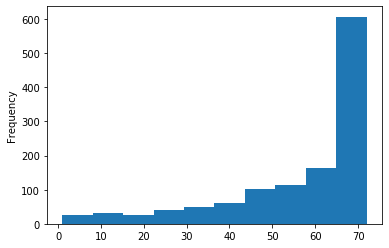

In [140]:
train4.tenure.plot.hist()

In [141]:
scaler_mm = sklearn.preprocessing.MinMaxScaler()

scaler_mm.fit(train4[['tenure']])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [142]:
train4

,customer_id,monthly_charges,tenure,total_charges,contract_type_id,contract_type
1050,9861-PDSZP,108.05,72,7806.60,3,Two year
971,8041-TMEID,108.50,63,6991.90,3,Two year
590,9443-JUBUO,65.25,72,4478.85,3,Two year
588,9415-ZNBSX,89.00,70,6293.20,3,Two year
1322,3976-HXHCE,19.30,72,1414.80,3,Two year
...,...,...,...,...,...,...
1218,2481-SBOYW,25.00,61,1498.35,3,Two year
355,5915-ANOEI,79.15,70,5536.50,3,Two year
1085,0505-SPOOW,19.80,70,1397.65,3,Two year
613,9795-NREXC,85.00,64,5484.40,3,Two year


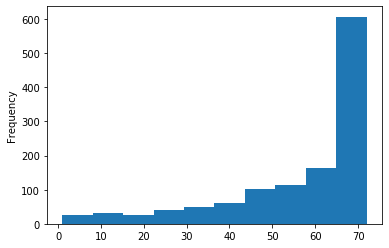

In [143]:
train4.tenure.plot.hist()

In [144]:
train4['tenure_scaled'] = scaler_mm.transform(train4[['tenure']])

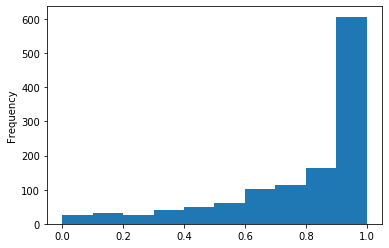

In [128]:
train4.tenure_scaled.plot.hist()

In [145]:
train4

,customer_id,monthly_charges,tenure,total_charges,contract_type_id,contract_type,tenure_scaled
1050,9861-PDSZP,108.05,72,7806.60,3,Two year,1.000000
971,8041-TMEID,108.50,63,6991.90,3,Two year,0.873239
590,9443-JUBUO,65.25,72,4478.85,3,Two year,1.000000
588,9415-ZNBSX,89.00,70,6293.20,3,Two year,0.971831
1322,3976-HXHCE,19.30,72,1414.80,3,Two year,1.000000
...,...,...,...,...,...,...,...
1218,2481-SBOYW,25.00,61,1498.35,3,Two year,0.845070
355,5915-ANOEI,79.15,70,5536.50,3,Two year,0.971831
1085,0505-SPOOW,19.80,70,1397.65,3,Two year,0.971831
613,9795-NREXC,85.00,64,5484.40,3,Two year,0.887324


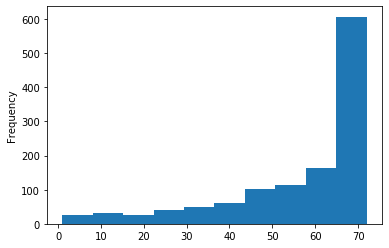

In [146]:
train4[['tenure_invert']] = scaler_mm.inverse_transform(train4[['tenure_scaled']])
train4.tenure_invert.plot.hist()

In [147]:
train4

,customer_id,monthly_charges,tenure,total_charges,contract_type_id,contract_type,tenure_scaled,tenure_invert
1050,9861-PDSZP,108.05,72,7806.60,3,Two year,1.000000,72.0
971,8041-TMEID,108.50,63,6991.90,3,Two year,0.873239,63.0
590,9443-JUBUO,65.25,72,4478.85,3,Two year,1.000000,72.0
588,9415-ZNBSX,89.00,70,6293.20,3,Two year,0.971831,70.0
1322,3976-HXHCE,19.30,72,1414.80,3,Two year,1.000000,72.0
...,...,...,...,...,...,...,...,...
1218,2481-SBOYW,25.00,61,1498.35,3,Two year,0.845070,61.0
355,5915-ANOEI,79.15,70,5536.50,3,Two year,0.971831,70.0
1085,0505-SPOOW,19.80,70,1397.65,3,Two year,0.971831,70.0
613,9795-NREXC,85.00,64,5484.40,3,Two year,0.887324,64.0


#### 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [137]:
sklearn.preprocessing.QuantileTransformer?

In [200]:
# Using the QuantileTransformer:

# Reimporting data under another train/validate/test dataset:

train5, validate5, test5 = wrangle.prep_acquired_telco()

Shape of train df: (1217, 6)
Shape of validate df: (215, 6)
Shape of test df: (253, 6)


In [201]:
# 1. Creating the scaler object:

scaler_qt = sklearn.preprocessing.QuantileTransformer(n_quantiles = 5, random_state = 123, output_distribution = 'normal')

# 2. Fitting ONLY do the train dataset. Remember, this is only useful on continuous variables, not categorical variables:
scaler_qt.fit(train5[['total_charges', 'monthly_charges', 'tenure']])

# 3. Now use the object on all three datasets. Remember, I'm using this object which was fitted to the train dataset:
train5[['total_charges_scaled', 'monthly_charges_scaled', 'tenure_scaled']] = scaler_qt.transform(train5[['total_charges', 'monthly_charges', 'tenure']])
validate5[['total_charges_scaled', 'monthly_charges_scaled', 'tenure_scaled']] = scaler_qt.transform(validate5[['total_charges', 'monthly_charges', 'tenure']])
test5[['total_charges_scaled', 'monthly_charges_scaled', 'tenure_scaled']] = scaler_qt.transform(test5[['total_charges', 'monthly_charges', 'tenure']])

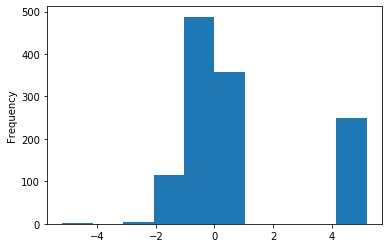

In [202]:
train5.tenure_scaled.plot.hist()

# It produced an approximately normal distribution:

#### 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

In [209]:
# Using the QuantileTransformer:

# Reimporting data under another train/validate/test dataset:

train5, validate5, test5 = wrangle.prep_acquired_telco()
train5.head()

Shape of train df: (1217, 6)
Shape of validate df: (215, 6)
Shape of test df: (253, 6)


,customer_id,monthly_charges,tenure,total_charges,contract_type_id,contract_type
1050,9861-PDSZP,108.05,72,7806.60,3,Two year
971,8041-TMEID,108.50,63,6991.90,3,Two year
590,9443-JUBUO,65.25,72,4478.85,3,Two year
588,9415-ZNBSX,89.00,70,6293.20,3,Two year
1322,3976-HXHCE,19.30,72,1414.80,3,Two year


In [204]:
# 1. Creating the scaler object:

scaler_qt = sklearn.preprocessing.QuantileTransformer(n_quantiles = 5, random_state = 123)

# n_quantiles = 5, random_state = 123, output_distribution = 'normal'

# 2. Fitting ONLY do the train dataset. Remember, this is only useful on continuous variables, not categorical variables:
scaler_qt.fit(train5[['total_charges', 'monthly_charges', 'tenure']])

# 3. Now use the object on all three datasets. Remember, I'm using this object which was fitted to the train dataset:
train5[['total_charges_scaled', 'monthly_charges_scaled', 'tenure_scaled']] = scaler_qt.transform(train5[['total_charges', 'monthly_charges', 'tenure']])
validate5[['total_charges_scaled', 'monthly_charges_scaled', 'tenure_scaled']] = scaler_qt.transform(validate5[['total_charges', 'monthly_charges', 'tenure']])
test5[['total_charges_scaled', 'monthly_charges_scaled', 'tenure_scaled']] = scaler_qt.transform(test5[['total_charges', 'monthly_charges', 'tenure']])

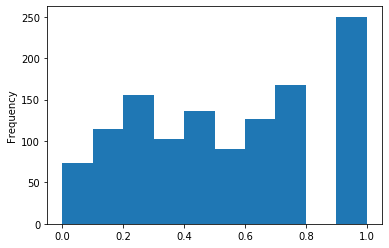

In [206]:
train5.tenure_scaled.plot.hist()

The default output of the function is to use a uniform distribution, and that's what this output appears to be.

In [207]:
# Now, for practice I'm going to add columns using the inverse_transform method:

# train5[['total_inverted', 'monthly_inverted', 'tenure_inverted']] = scaler_qt.inverse_transform(train5[['total_charges', 'monthly_charges', 'tenure']])